In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
dataset=pd.read_csv('openiit.csv')
#dataset['Week']=pd.to_datetime(dataset['Week'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Week'])

FileNotFoundError: ignored

In [ ]:

indexedDataset.head(50)

In [ ]:
plt.xlabel("week")
plt.ylabel("Weekwise Tourists")
plt.plot(indexedDataset)


In [3]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=52).mean()

rolstd = indexedDataset.rolling(window=52).std()
print(rolmean,rolstd)

NameError: ignored

In [4]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(indexedDataset,color='yellow',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

NameError: ignored

In [ ]:
#perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest= adfuller(indexedDataset['Weekwise Tourists'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.016854e+00
p-value                        1.526422e-07
#Lags Used                     1.900000e+01
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64


      Weekwise Tourists
Week                   
1             10.568985
2             10.568985
3             10.568985
4             10.568985
5             10.568985
...                 ...
527           10.959705
528           10.397757
529           10.397757
530           10.397757
531           10.397757

[531 rows x 1 columns]


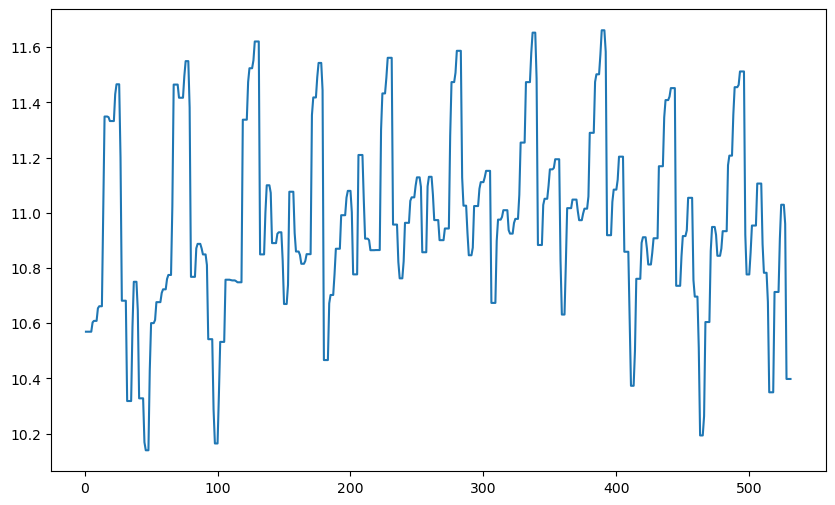

In [ ]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
print(indexedDataset_logScale)

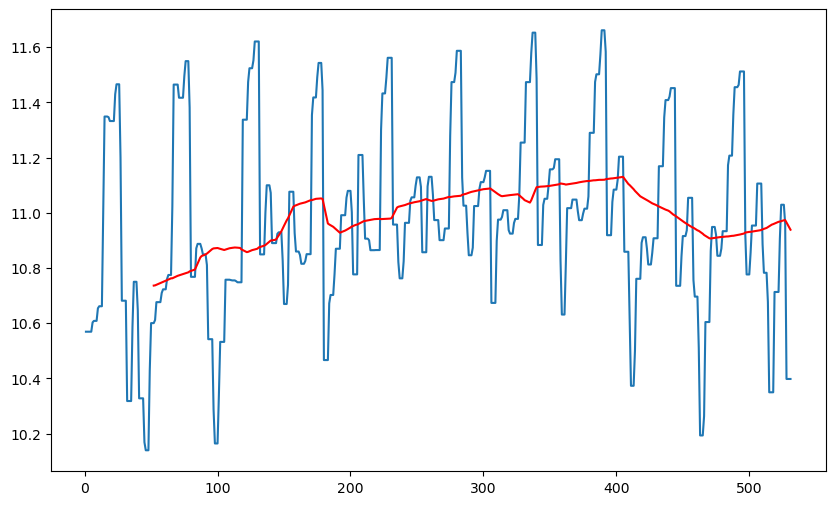

In [ ]:
movingAverage= indexedDataset_logScale.rolling(window=52).mean()
movingSTD= indexedDataset_logScale.rolling(window=52).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [ ]:
datasetLogScaleMinusMovingAverage= indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Weekwise Tourists
Week,
52,-0.135906
53,-0.125513
54,-0.062841
55,-0.064901
56,-0.066961
57,-0.069020
58,-0.037704
59,-0.026860
60,-0.029058


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determine rolling statistics
    movingAverage=timeseries.rolling(window=52).mean()
    movingSTD= timeseries.rolling(window=52).std()

    #plot rolling statistics
    orig=plt.plot(timeseries, color='blue',label='Original')
    mean=plt.plot(movingAverage, color='red',label='Rolling Mean')
    plt.plot(movingSTD, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest= adfuller(timeseries['Weekwise Tourists'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)


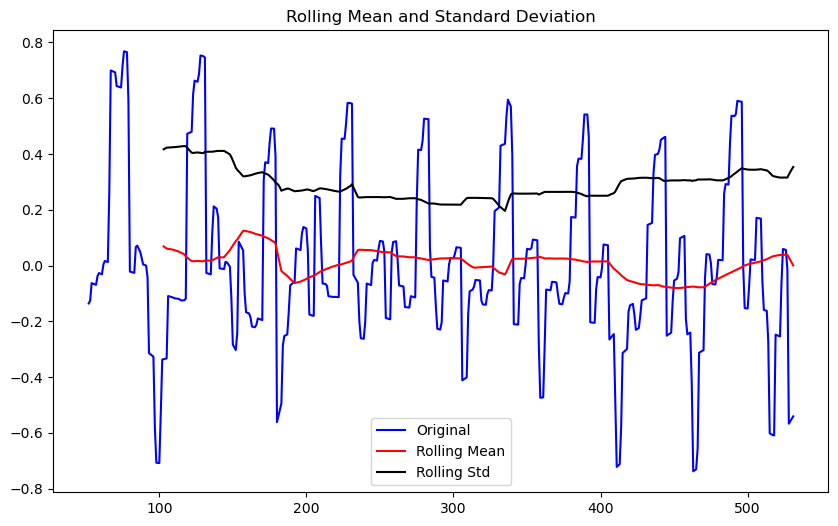

Results of Dickey-Fuller Test:
Test Statistic                -6.156312e+00
p-value                        7.354121e-08
#Lags Used                     1.800000e+01
Number of Observations Used    4.610000e+02
Critical Value (1%)           -3.444615e+00
Critical Value (5%)           -2.867830e+00
Critical Value (10%)          -2.570120e+00
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

      Weekwise Tourists
Week                   
1             10.568985
2             10.568985
3             10.568985
4             10.568985
5             10.568985
...                 ...
527           10.959705
528           10.397757
529           10.397757
530           10.397757
531           10.397757

[531 rows x 1 columns]


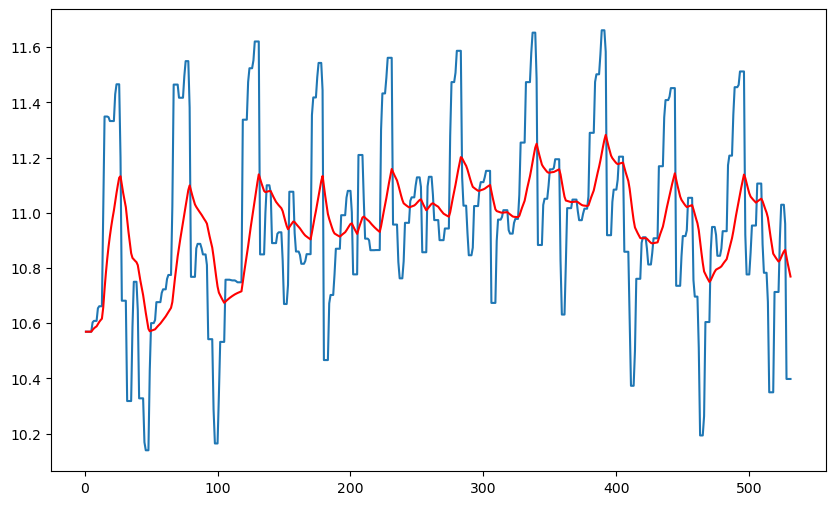

In [ ]:
exponentDecayWeightedAverage= indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentDecayWeightedAverage, color='red')
print(indexedDataset_logScale)

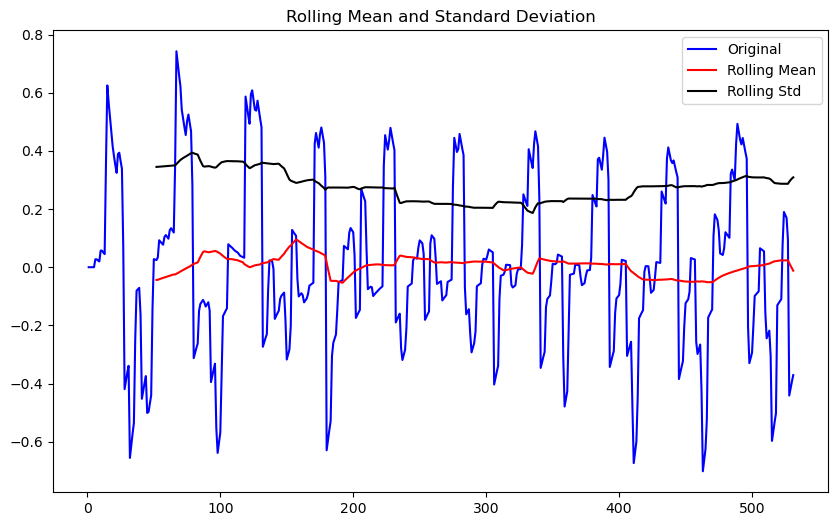

Results of Dickey-Fuller Test:
Test Statistic                -6.873374e+00
p-value                        1.495841e-09
#Lags Used                     1.900000e+01
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

      Weekwise Tourists
Week                   
1                   NaN
2              0.000000
3              0.000000
4              0.000000
5              0.000000
...                 ...
527           -0.069200
528           -0.561948
529            0.000000
530            0.000000
531            0.000000

[531 rows x 1 columns]


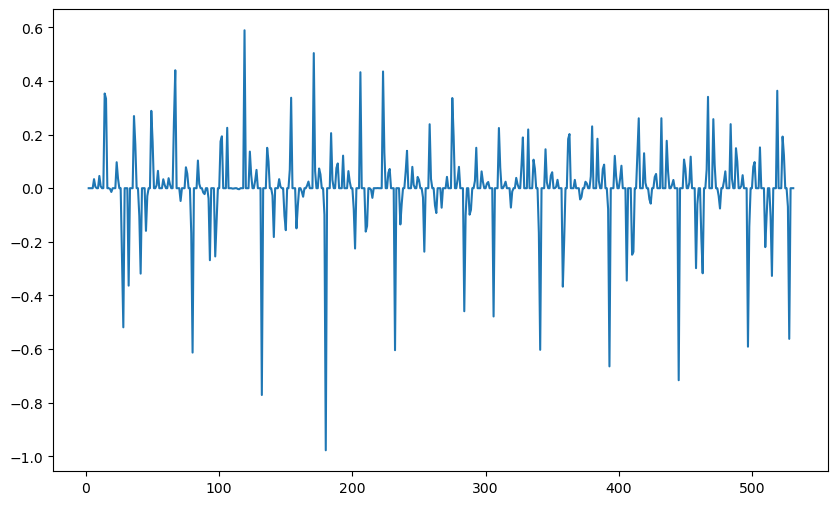

In [ ]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
print(datasetLogDiffShifting)


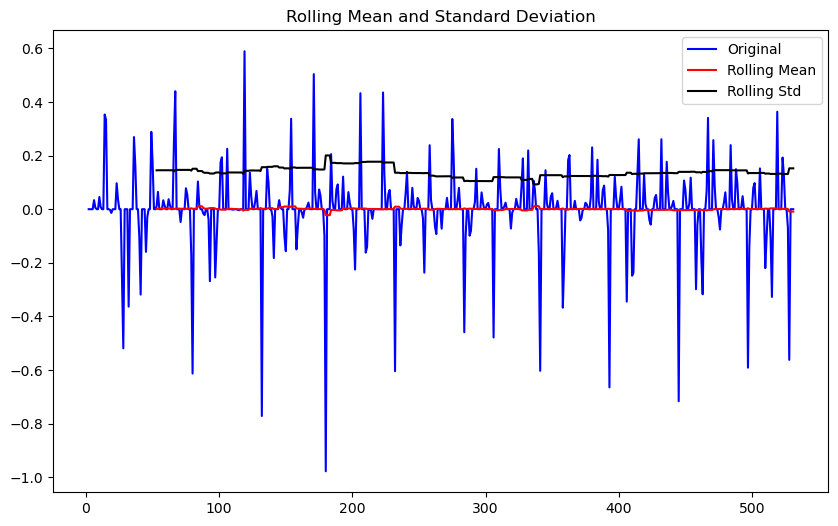

Results of Dickey-Fuller Test:
Test Statistic                -6.219211e+00
p-value                        5.273570e-08
#Lags Used                     1.600000e+01
Number of Observations Used    5.130000e+02
Critical Value (1%)           -3.443162e+00
Critical Value (5%)           -2.867190e+00
Critical Value (10%)          -2.569780e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

      Weekwise Tourists
Week                   
27             0.141572
28            -0.160883
29             0.106011
30             0.119144
31             0.117968
...                 ...
501           -0.034955
502            0.042714
503            0.050892
504            0.036475
505            0.012189

[479 rows x 1 columns]


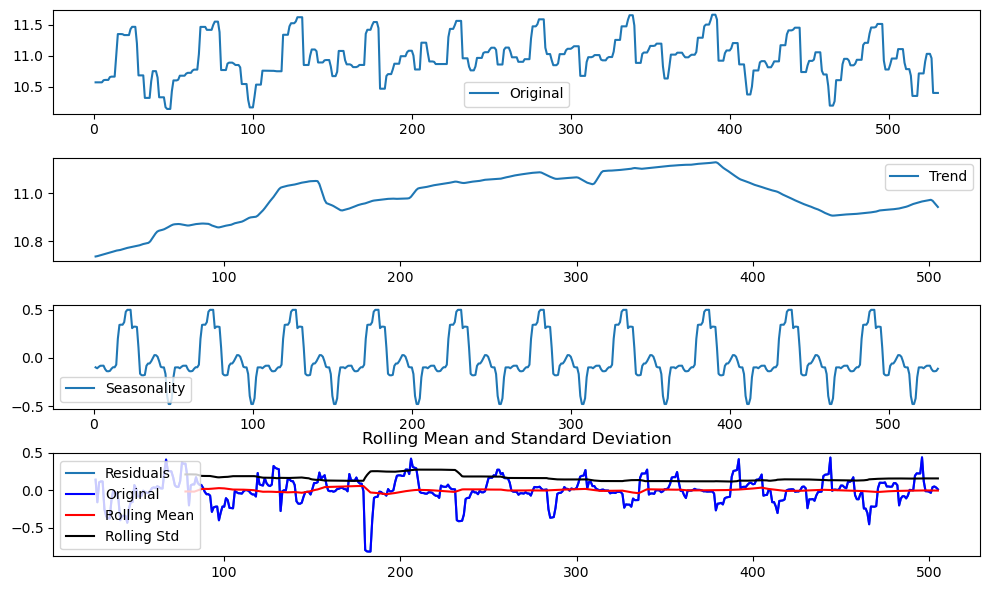

Results of Dickey-Fuller Test:
Test Statistic                  -5.352341
p-value                          0.000004
#Lags Used                      13.000000
Number of Observations Used    465.000000
Critical Value (1%)             -3.444491
Critical Value (5%)             -2.867776
Critical Value (10%)            -2.570091
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale,period=52)


trend =decomposition.trend
seasonal =decomposition.seasonal
residual =decomposition.resid

residual_df = pd.DataFrame(residual)
residual_df.columns = ['Weekwise Tourists']

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual_df
decomposedLogData.dropna(inplace=True)
print(decomposedLogData)
test_stationarity(decomposedLogData)


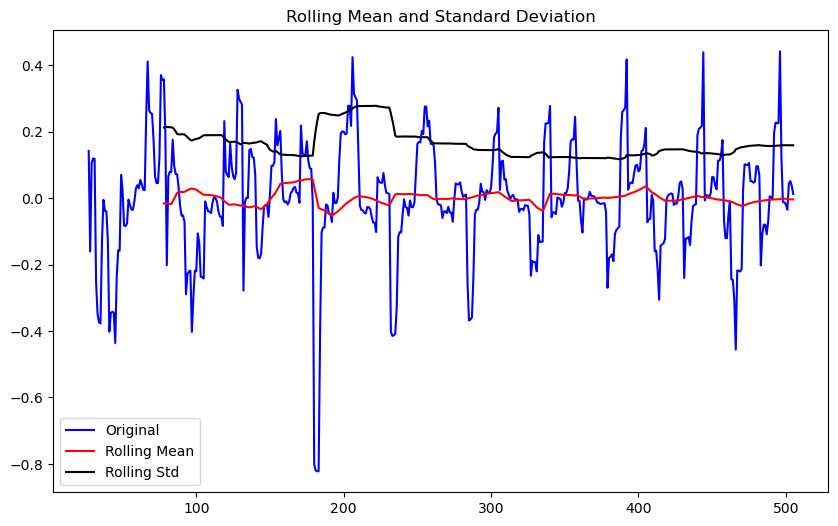

Results of Dickey-Fuller Test:
Test Statistic                  -5.352341
p-value                          0.000004
#Lags Used                      13.000000
Number of Observations Used    465.000000
Critical Value (1%)             -3.444491
Critical Value (5%)             -2.867776
Critical Value (10%)            -2.570091
dtype: float64


In [ ]:
decomposedLogData= residual_df
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

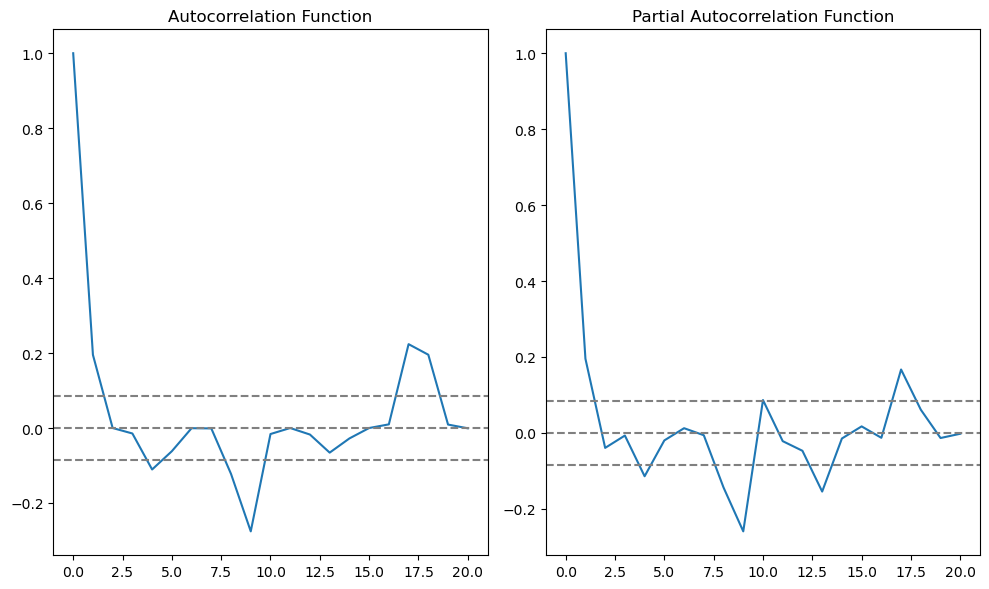

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20,method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\TESTUSER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TESTUSER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TESTUSER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


      Weekwise Tourists
Week                   
1              0.000000
2             10.568985
3             10.568985
4             10.568985
5             10.568985
...                 ...
527           11.022311
528           10.942071
529           10.313101
530           10.431784
531           10.453190

[531 rows x 1 columns]
Plotting AR model


C:\Users\TESTUSER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


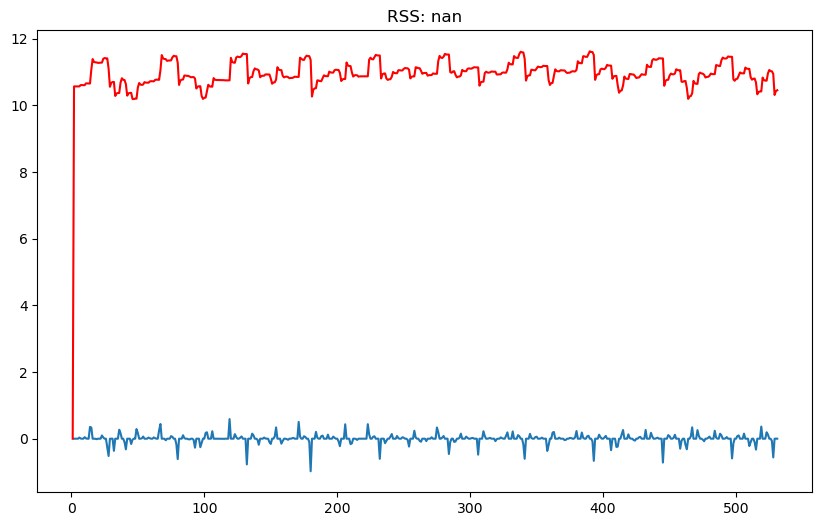

In [ ]:
#p value can be 0.5-1
from statsmodels.tsa.arima.model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logScale,order=(2,1,2))
results_AR = model.fit()
fitted_values = results_AR.fittedvalues

# Create a DataFrame with the fitted values
results_ar = pd.DataFrame({'Weekwise Tourists': fitted_values})

# Now, you can use the 'results_ar' DataFrame as needed
print(results_ar)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:% 4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Weekwise Tourists"])**2))
print('Plotting AR model')

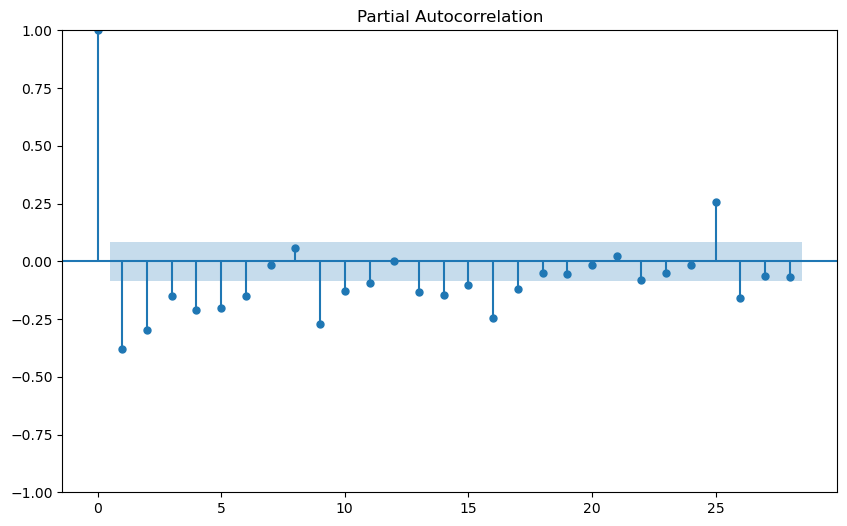

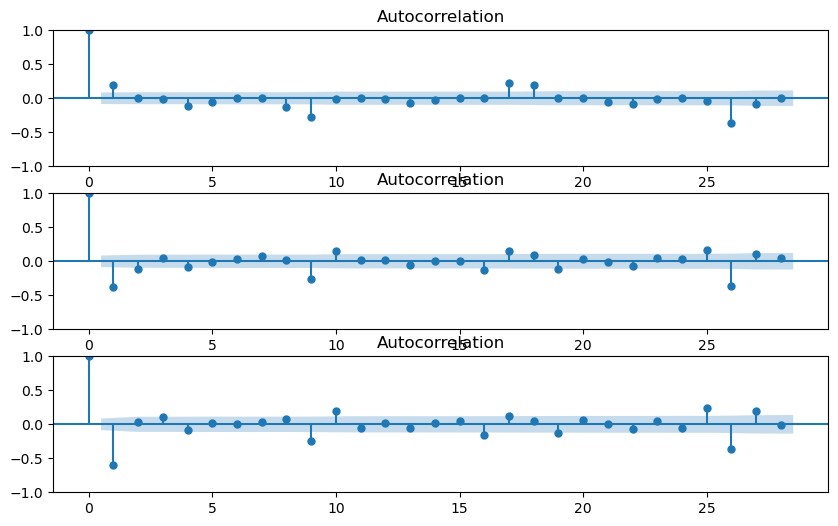

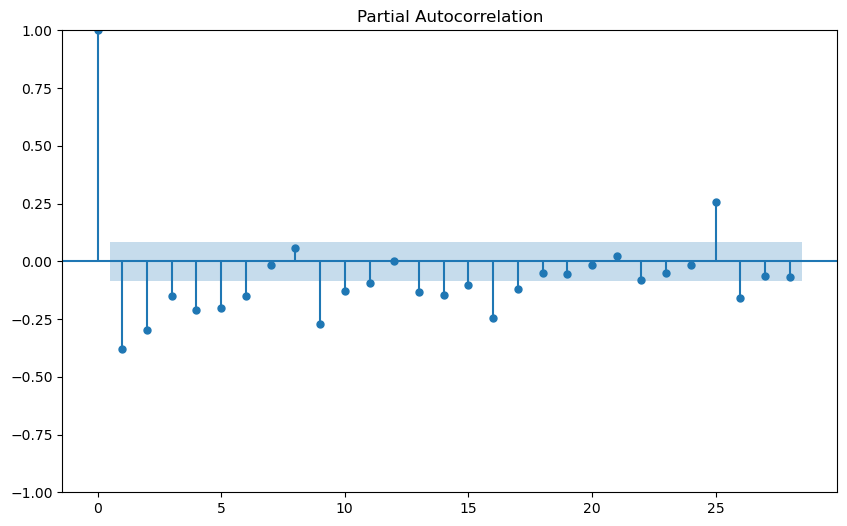

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(datasetLogDiffShifting, ax=ax1)
plot_acf(datasetLogDiffShifting.diff().dropna(), ax=ax2)
plot_acf(datasetLogDiffShifting.diff().diff().dropna(), ax=ax3)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(datasetLogDiffShifting.diff().dropna())

In [ ]:
predictions_ARIMA_diff = results_ar['Weekwise Tourists']
predictions_ARIMA_diff1 = pd.DataFrame({'Weekwise Tourists':predictions_ARIMA_diff })

print(predictions_ARIMA_diff1.head())

      Weekwise Tourists
Week                   
1              0.000000
2             15.853477
3             10.568985
4             10.568985
5             10.568985


In [ ]:
# Calculate the cumulative sum of the Series
predictions_ARIMA_diff1_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff1_CUMSUM = pd.DataFrame({'Weekwise Tourists': predictions_ARIMA_diff1_cumsum})

# Print the first few values
print(predictions_ARIMA_diff1_CUMSUM.head())

      Weekwise Tourists
Week                   
1              0.000000
2             15.853477
3             26.422463
4             36.991448
5             47.560433


In [ ]:
# Create a Series with initial value from the first row and matching index
predictions_ARIMA_log = pd.Series(indexedDataset_logScale["Weekwise Tourists"].iloc[0], index=indexedDataset_logScale.index)

# Add the cumulative sum of differences to the Series
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff1_cumsum, fill_value=0)

# Print the first few values
print(predictions_ARIMA_log.head())

Week
1    10.568985
2    26.422462
3    36.991448
4    47.560433
5    58.129418
dtype: float64


      Weekwise Tourists
Week                   
1              38909.16
2              38909.16
3              38909.16
4              38909.16
5              38909.16
...                 ...
527            57509.46
528            32786.00
529            32786.00
530            32786.00
531            32786.00

[531 rows x 1 columns]
      Weekwise Tourists
Week                   
1          3.890916e+04
2          2.986274e+11
3          1.161934e+16
4          4.520989e+20
5          1.759079e+25
...                 ...
527                 inf
528                 inf
529                 inf
530                 inf
531                 inf

[531 rows x 1 columns]


C:\Users\TESTUSER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


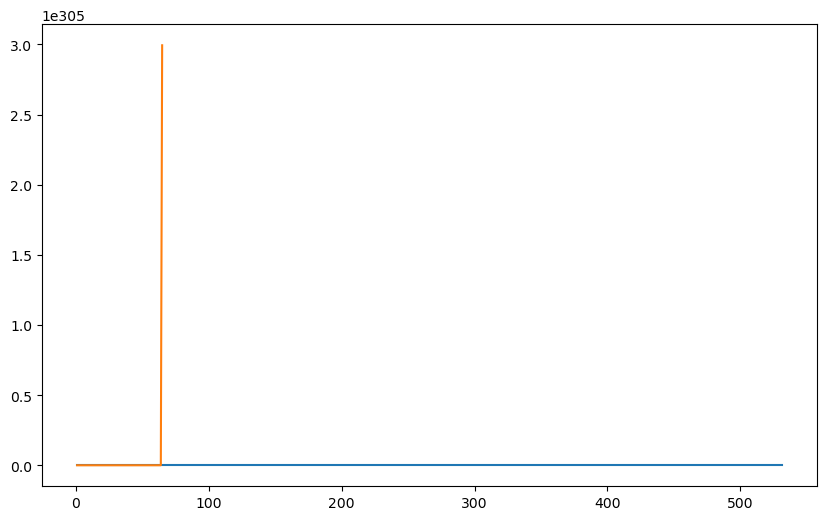

In [ ]:

plt.plot(indexedDataset)
print(indexedDataset)
predictions_ARIMA=np.exp(predictions_ARIMA_log)
predictions_ARIMA1 = pd.DataFrame({'Weekwise Tourists': predictions_ARIMA})
print(predictions_ARIMA1)
plt.plot(predictions_ARIMA1)